For now this file contains concepts for visualization.

In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_final.csv')

In [3]:
data.head()

,Unnamed: 0,horsepower,liters,cylinders,valves,V,I,H,W,111.2Ah,...,mazda,cadillac,mclaren,dodge,maybach,gmc,hummer,plymouth,chevrolet,polestar
0,0,172.0,1.6,4.0,16.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,252.0,3.9,8.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,320.0,5.3,8.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,420.0,5.0,8.0,32.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,208.0,2.0,4.0,16.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# data preparation
First, prepare the data for plotting. Keep numeric and binary clumns as these are well suited for potting.

In [4]:
useful_cols = ['horsepower', 'liters', 'cylinders', 'valves', "V", "I", "H", "W", "Range", "model_year", "milage", "accident", "clean_title", "price", "gears", "Automatic", "Manual"]
useful_data = data[useful_cols]
useful_data.head()

,horsepower,liters,cylinders,valves,V,I,H,W,Range,model_year,milage,accident,clean_title,price,gears,Automatic,Manual
0,172.0,1.6,4.0,16.0,0,0,0,0,0,2007.0,213000.0,0.0,1.0,4200.0,6.0,1,0
1,252.0,3.9,8.0,32.0,0,0,0,0,0,2002.0,143250.0,1.0,1.0,4999.0,6.0,1,0
2,320.0,5.3,8.0,32.0,0,0,0,0,0,2002.0,136731.0,0.0,1.0,13900.0,6.0,1,0
3,420.0,5.0,8.0,32.0,0,0,0,0,0,2017.0,19500.0,0.0,1.0,45000.0,6.0,0,0
4,208.0,2.0,4.0,16.0,0,0,0,0,0,2021.0,7388.0,0.0,1.0,97500.0,7.0,1,0


In [ ]:
count = sum(1 for col in data.columns if col.startswith("int_") or col.startswith("ext_"))
print(f"Total columns starting with 'int_' or 'ext_': {count}")

Total columns starting with 'int_' or 'ext_': 406


In [ ]:
# replace the binary label of feature "accident" with strings for easier plotting
column_name = 'accident'

mapping = {
    0: "None reported",
    1: "accident or damage reported"
}

useful_data[column_name] = useful_data[column_name].replace(mapping)

C:\Users\Gerri\AppData\Local\Temp\ipykernel_20744\843764273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# same with "clean_title"
column_name = 'clean_title'

mapping = {
    0: "no clean title",
    1: "clean title"
}

useful_data[column_name] = useful_data[column_name].replace(mapping)

C:\Users\Gerri\AppData\Local\Temp\ipykernel_20744\2923680076.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# now data is more plottable :)
useful_data.head()

,horsepower,liters,cylinders,valves,V,I,H,W,Range,model_year,milage,accident,clean_title,price,gears,Automatic,Manual
0,172.0,1.6,4.0,16.0,0,0,0,0,0,2007.0,213000.0,None reported,clean title,4200.0,6.0,1,0
1,252.0,3.9,8.0,32.0,0,0,0,0,0,2002.0,143250.0,accident or damage reported,clean title,4999.0,6.0,1,0
2,320.0,5.3,8.0,32.0,0,0,0,0,0,2002.0,136731.0,None reported,clean title,13900.0,6.0,1,0
3,420.0,5.0,8.0,32.0,0,0,0,0,0,2017.0,19500.0,None reported,clean title,45000.0,6.0,0,0
4,208.0,2.0,4.0,16.0,0,0,0,0,0,2021.0,7388.0,None reported,clean title,97500.0,7.0,1,0


# plotnine plots

In [9]:
# define a theme to make plots readable
my_theme = (
    p9.theme_minimal() + 
    p9.theme(
        # General text size
        text=p9.element_text(size=14),
        
        # Specific Axis Title sizes
        axis_title_x=p9.element_text(size=28),
        axis_title_y=p9.element_text(size=28)
    )
)

c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 131'. Pick better value with 'binwidth'.


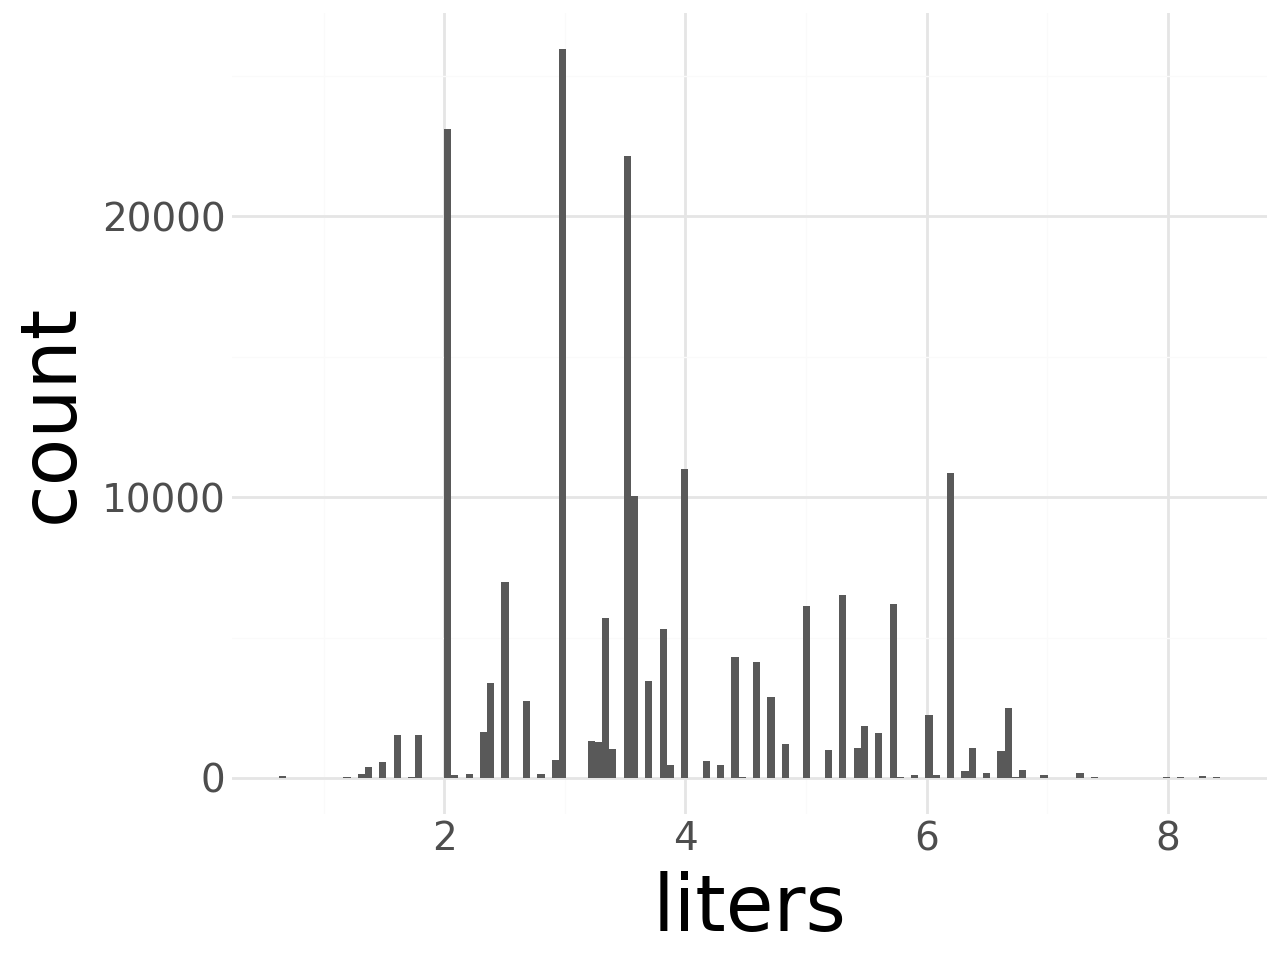

In [10]:
# adapt the parameters to create any plot
p = (
    p9.ggplot(useful_data, mapping = p9.aes(x="liters"))
    # + p9.geom_point(size=0.2, position="jitter")
    # + p9.geom_boxplot()
    # + p9.geom_bar()
    + p9.geom_histogram()
    + my_theme
    # + p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))

    + p9.lims(
        # x=(0, 150000),
        # y=(0, 100000)
    )
    # + p9.labs(x="cylinders")
)
p.show()


In [ ]:
# save the generated plot as a .png
title="price_histogram"
p.save(filename = f"plots/{title}.png", format = "png", width = 15, height = 10)

c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 15 x 10 in image.
c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: plots/price_histogram.png
c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 131'. Pick better value with 'binwidth'.


## reference
some reference plotnine plots

### fancy barplot

c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_count : Removed 3 rows containing non-finite values.


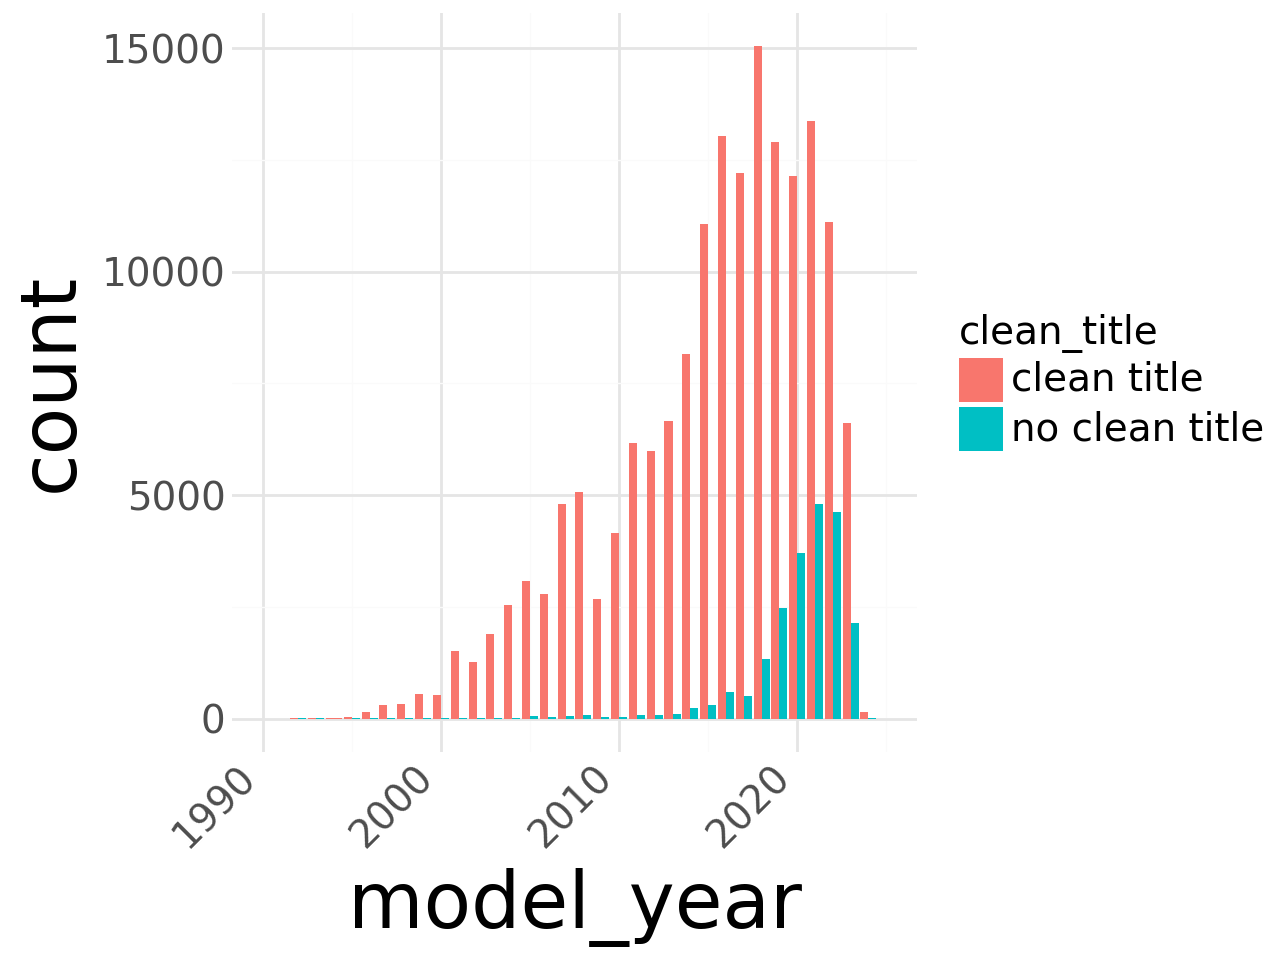

In [12]:
# barplot
(
p9.ggplot(
    data = useful_data,
    mapping = p9.aes(x = 'model_year', fill='clean_title')    # use color or fill parameter
)
    + p9.geom_bar(position='dodge') # use stack, dodge or fill
    + my_theme
    + p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))
    + p9.lims(
        x=(1990, 2025),
        # y=(0, 800000)
    )
)

### violin plot

c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_ydensity : Removed 1185 rows containing non-finite values.


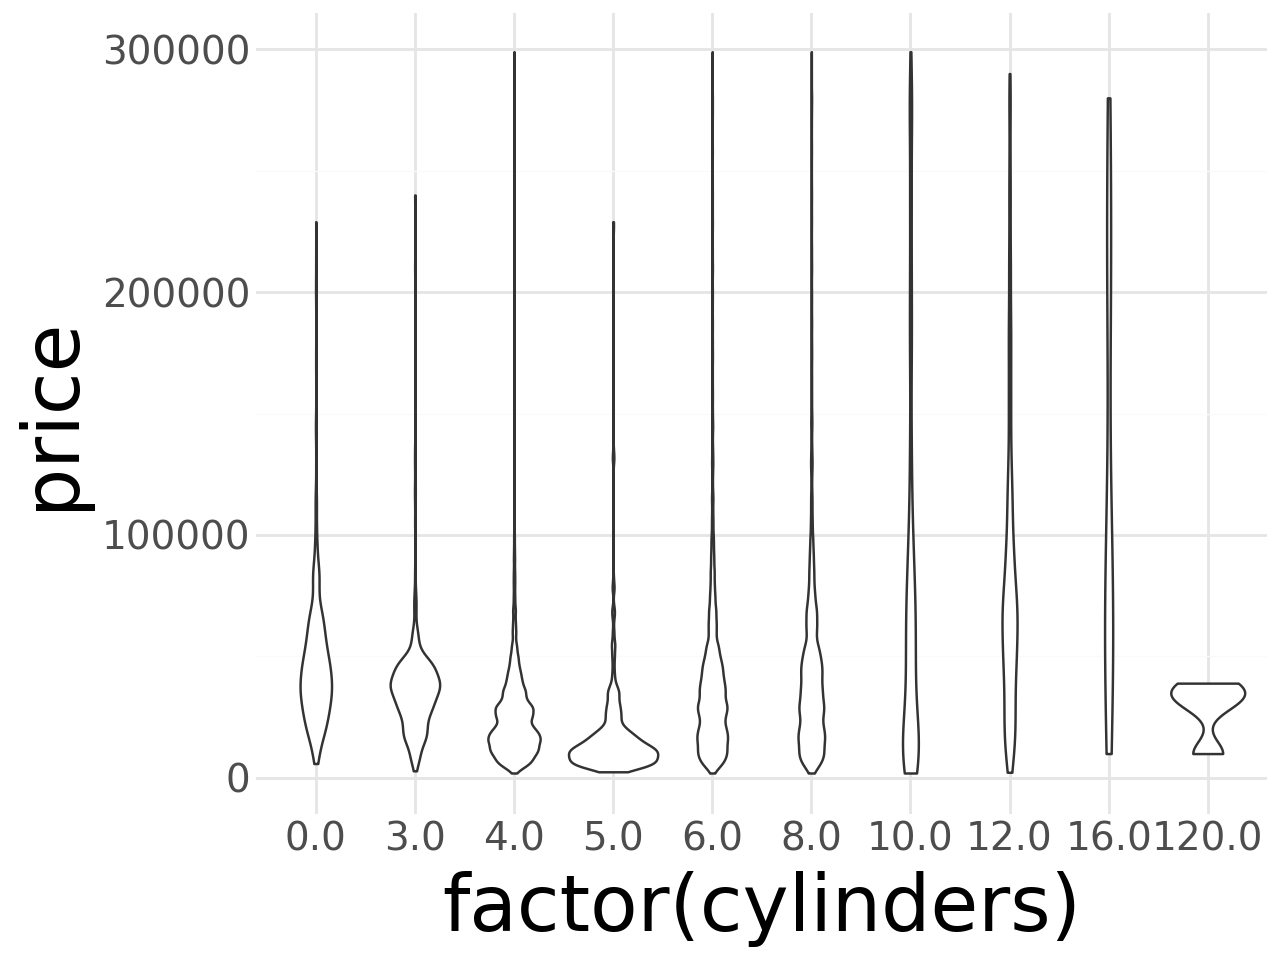

In [13]:
# boxplot
(
p9.ggplot(
    data = useful_data,
    mapping = p9.aes(x ='factor(cylinders)', y='price')
) 
    + p9.geom_violin()
    + my_theme
    + p9.lims(
        # x=(0, 20),
        y=(0, 300000)
    )
)

### barplot

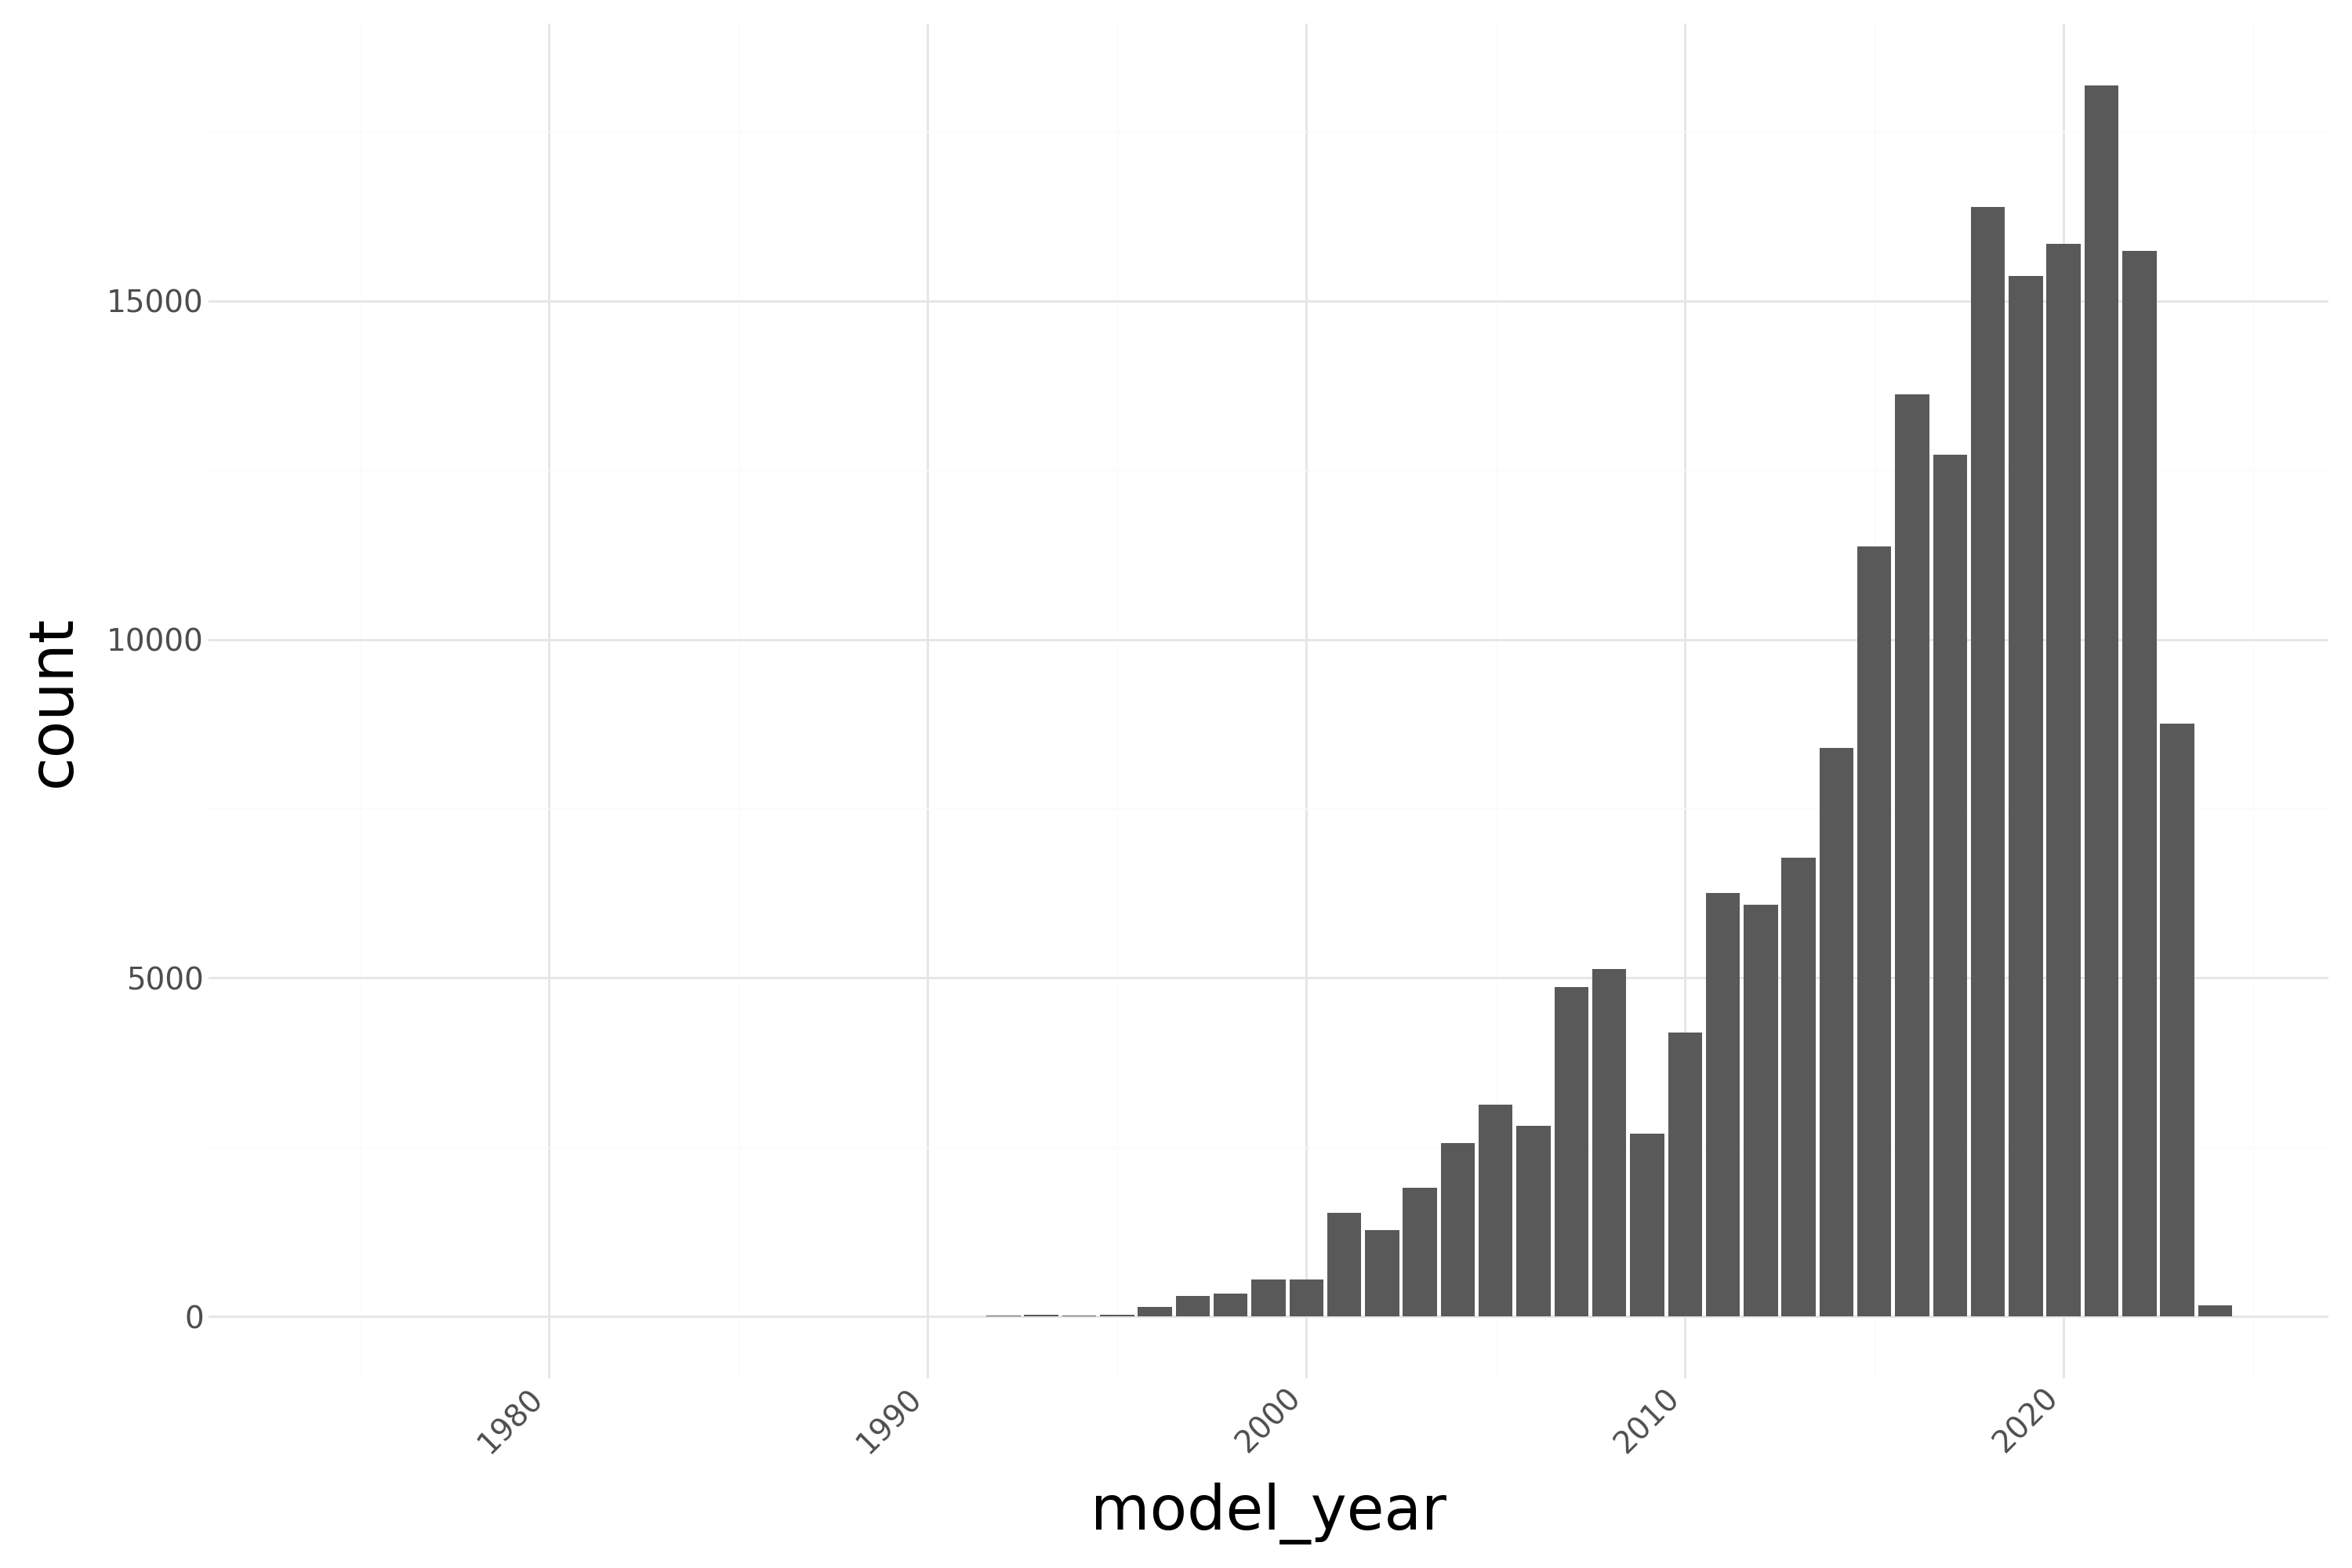

In [14]:
# barplot
(
p9.ggplot(
    data = useful_data,
    mapping = p9.aes(x = 'model_year')
)
    + p9.geom_bar()
    + my_theme
    + p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1), figure_size=(15, 10))
    + p9.lims(
        # x=(500, 600),
      #   y=(50000, 250000)
    )
)

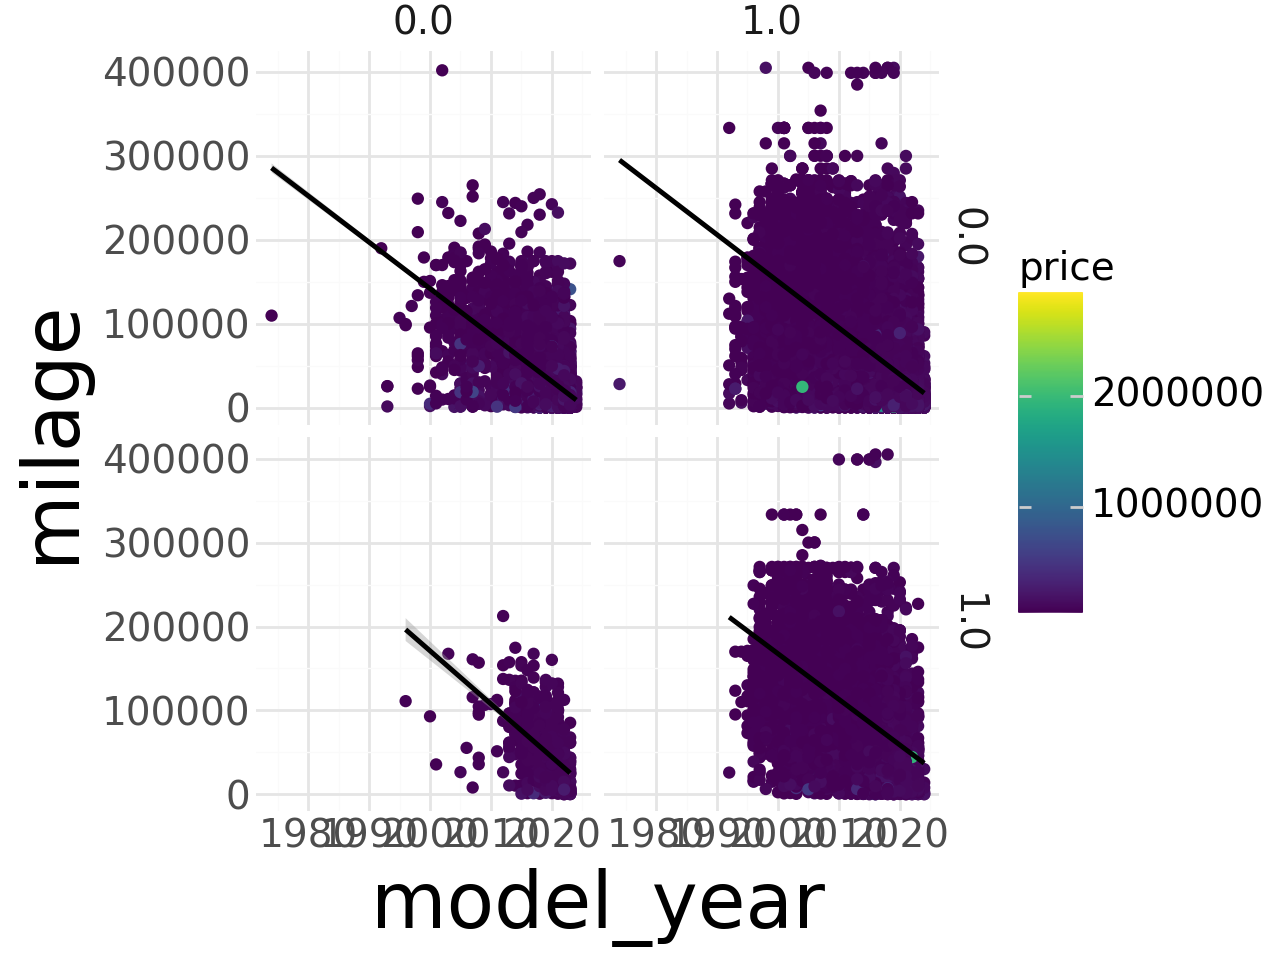

In [15]:
# scatterplot
(
    p9.ggplot(data, mapping = p9.aes(x='model_year', y='milage', color='price'))
    + p9.geom_point() +
    p9.geom_smooth(method = 'lm') +
    p9.facet_grid('accident ~ clean_title') # or facet_wrap
    + my_theme
)

### histogram

c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


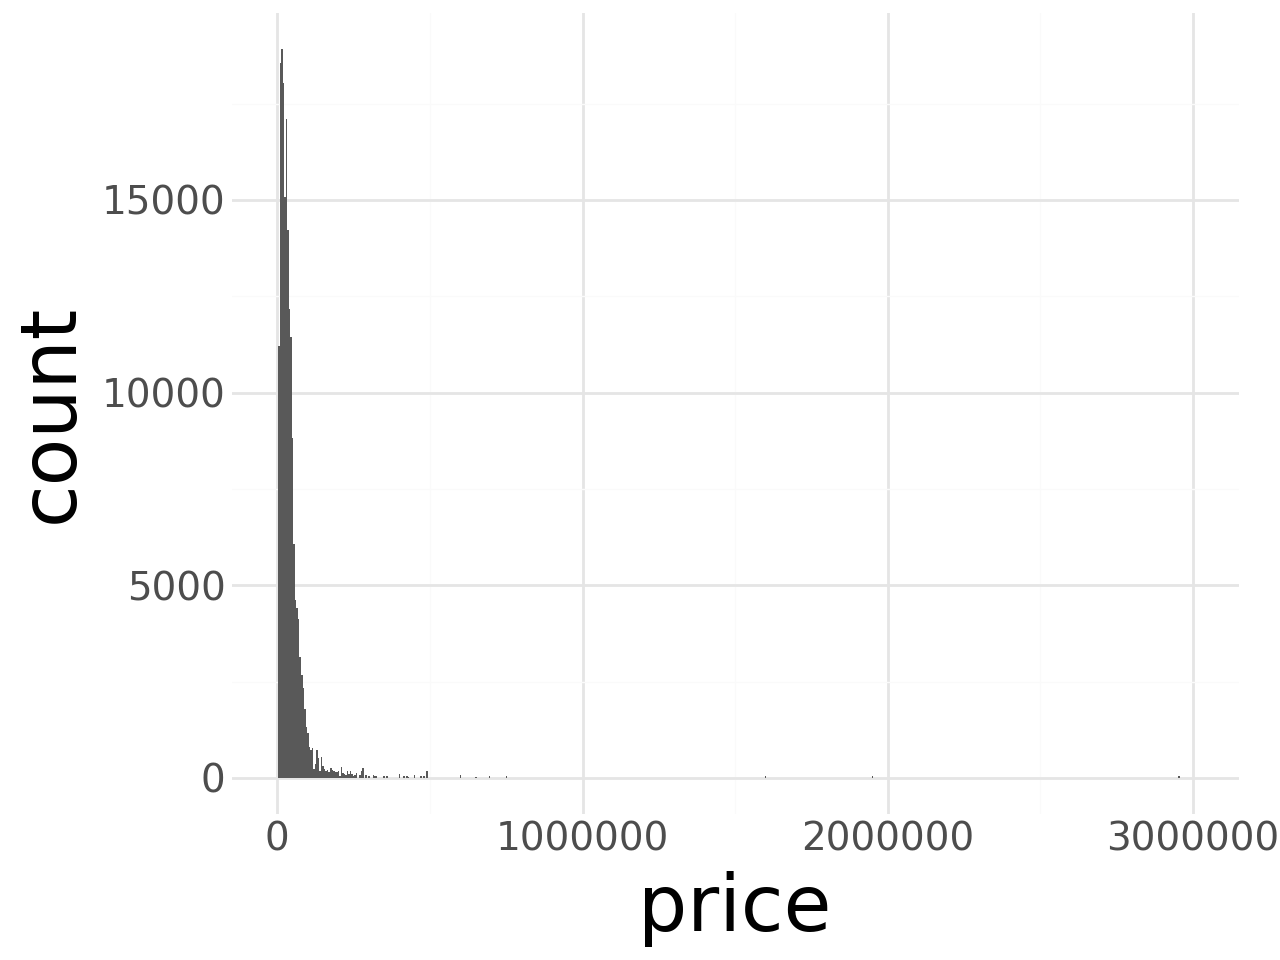

In [16]:
(p9.ggplot(
    data = data,
    mapping = p9.aes(x = 'price')
  )
  + p9.geom_histogram(binwidth=5000)  # use bins or binwidth
  + p9.lims(
        x=(0, 3000000),
      #   y=(50000, 250000)
  )
  + my_theme
)